In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
import scipy.interpolate as inp

# 磁电转换特性

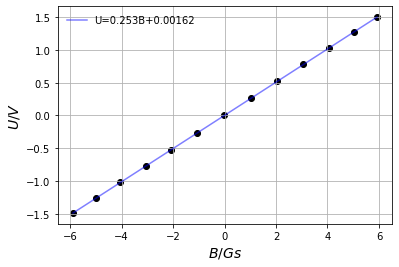

In [9]:
I=np.linspace(-300,300,13)
U=[-1.488,-1.262,-1.022,-0.774,-0.524,-0.265,0.000,0.260,0.520,0.778,1.028,1.270,1.500]
poly1=np.polyfit(I,U,1)
B=[Gs(x) for x in U]
plt.scatter(B,U,c='k')

poly=np.polyfit(B,U,1)
plt.plot(B,np.polyval(poly,B),c='b',alpha=0.5,label='U={:.3f}B+{:.5f}'.format(poly[0],poly[1]))

plt.grid()
plt.legend(frameon=False)
plt.xlabel('$B/Gs$',fontsize=14)
plt.ylabel('$U/V$',fontsize=14)
plt.show()

In [5]:
f = np.poly1d(poly)
print(f)

 
0.2531 x + 0.001615


In [3]:
def Gs(i):
    return ((i-poly1[1])/poly1[0])/50

In [44]:
N, mu, R, I = 310, 4*np.pi*10**(-7), 0.14, 2e-1
def Theorical_B(i):
    return ((N*mu*R**2*I)/(2*(R**2+(i*10**(-3)+7e-2)**2)**(3/2)) + (N*mu*R**2*I)/(2*(R**2+(i*10**(-3)-7e-2)**2)**(3/2)))*10**4

# 轴向磁场分布

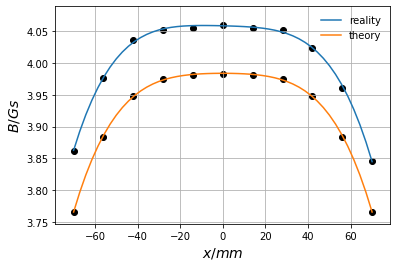

In [63]:
x=np.linspace(-70,70,11)
Bv=[0.979,1.008,1.023,1.027,1.028,1.029,1.028,1.027,1.020,1.004,0.975]
BG=[Gs(i) for i in Bv]
BGT=[Theorical_B(i) for i in x]
x0 = np.linspace(-70,70,50)
#plt.scatter(x,BG,c='k')
#plt.plot(x,np.polyval(np.polyfit(x,BG,4),x))

f1 = inp.UnivariateSpline(x, BG, k=4, s=2)
plt.scatter(x, BG, c='k')
plt.plot( x0, f1(x0), label="reality")

f2 = inp.UnivariateSpline(x, BGT, k=4, s=2)
plt.scatter(x, BGT, c='k')
plt.plot(x0, f2(x0), label="theory")
 
plt.grid()
plt.legend(frameon=False)
plt.xlabel('$x/mm$',fontsize=14)
plt.ylabel('$B/Gs$',fontsize=14)
plt.show()


# 各向异性

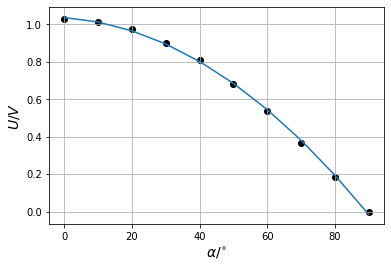

In [50]:
a=np.linspace(0,90,10)
U=[1.027,1.013,0.974,0.903,0.810,0.684,0.537,0.367,0.187,0.000]
plt.scatter(a,U,c='k')

poly=np.polyfit(a,U,2)
plt.plot(a,np.polyval(poly,a))

plt.grid()
plt.xlabel(r'$\alpha /^{\circ}$',fontsize=14)
plt.ylabel('$U/V$',fontsize=14)
plt.show()


# 空间磁场分布

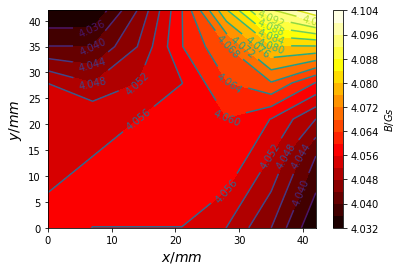

In [15]:
x=y=np.linspace(0,42,7)
Vx=[[1.029,1.028,1.028,1.028,1.027,1.025,1.022],
    [1.028,1.029,1.029,1.029,1.028,1.026,1.023],
    [1.028,1.028,1.029,1.029,1.029,1.027,1.024],
    [1.028,1.028,1.028,1.029,1.029,1.028,1.026],
    [1.027,1.026,1.027,1.028,1.030,1.031,1.029],
    [1.024,1.024,1.026,1.029,1.031,1.034,1.034],
    [1.022,1.022,1.025,1.029,1.034,1.038,1.040]]

BG=[Gs(x) for x in Vx]
plt.contourf(x,y,BG, 20, cmap='hot')
cb=plt.colorbar()
C=plt.contour(x,y,BG, 20)
plt.clabel(C, inline=True, fontsize=10)
cb.set_label('$B/Gs$')
plt.xlabel('$x/mm$',fontsize=14)
plt.ylabel('$y/mm$',fontsize=14)
plt.show()